In [57]:
import pandas as pd
import numpy as np
import json
import itertools as it
from scipy.spatial.distance import cosine
from surprise import Reader, Dataset, SVD
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import umap

In [9]:
all_ratings = pd.read_csv('/Users/irenebonafonte/Downloads/data_for_model/ratings.csv')
all_ratings.drop('rating_date', axis=1, inplace=True) 
all_ratings.shape, all_ratings.userId.nunique(), all_ratings.movieId.nunique()

# Keep only movies used in CF
content_ids = pd.read_csv('content_based_index.txt', header=None).iloc[:,0].unique()
all_ratings = all_ratings[all_ratings.movieId.isin(content_ids)]



In [13]:
# reader = Reader(rating_scale=(0, 5))
# trainset = Dataset.load_from_df(all_ratings, reader)
# trainset = trainset.build_full_trainset()
# svd = SVD(verbose=True, biased=False, n_epochs=20)
# svd.fit(trainset)
latent_factors = svd.pu
# user_sim = np.corrcoef(latent_factors)        

In [14]:
latent_factors.shape

(162540, 100)

In [26]:
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,10)

In [16]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(latent_factors)

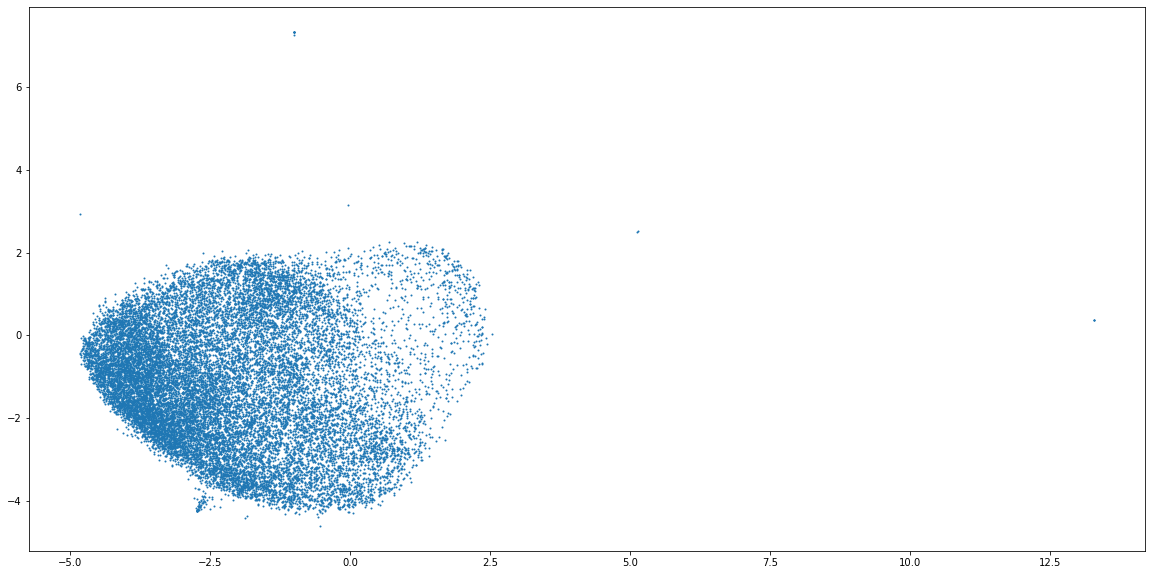

In [32]:
plt.scatter(embedding[0:20000, 0], embedding[0:20000, 1], s=1)

In [34]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=10, random_state=0).fit(latent_factors)
cluster = gm.predict(latent_factors) 

In [40]:
cluster

(162540,)

In [44]:
all_ratings

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
25000090,162541,50872,4.5
25000091,162541,55768,2.5
25000092,162541,56176,2.0
25000093,162541,58559,4.0


In [ ]:
all_users =  all_ratings['userId'].unique()
meta_ratings = np.zeros((10, all_ratings.movieId.nunique())) 
for cl in range(10):
    cl_ratings = all_ratings[all_ratings['userId'].isin(all_users[cluster == cl]), ]
    cl_ratings['userIdx'] = rankdata(cl_ratings.userId.values, method='dense') - 1
    cl_ratings['movieIdx'] = rankdata(cl_ratings.movieId.values, method='dense') - 1
    cl_ratings = coo_matrix((cl_ratings.rating.values, 
                (cl_ratings.movieIdx.values, 
                 cl_ratings.userIdx.values)), 
               shape=(4, 4)).toarray()
    meta_mean[i,:] = cl_ratings.mean()
    

In [47]:
all_users =  all_ratings['userId'].unique()
meta_ratings = np.zeros((10, all_ratings.movieId.nunique())) 
cl = 0
cl_ratings = all_ratings.loc[all_ratings['userId'].isin(all_users[cluster == cl]), :]

In [74]:
from scipy.stats import rankdata

cl_ratings['userIdx'] = rankdata(cl_ratings.userId.values, method='dense') - 1
cl_ratings['movieIdx'] = rankdata(cl_ratings.movieId.values, method='dense') - 1
cl_ratings

<ipython-input-74-9277064d5911>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_ratings['userIdx'] = rankdata(cl_ratings.userId.values, method='dense') - 1
<ipython-input-74-9277064d5911>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_ratings['movieIdx'] = rankdata(cl_ratings.movieId.values, method='dense') - 1


,userId,movieId,rating,userIdx,movieIdx
70,2,1,3.5,0,0
71,2,62,0.5,0,57
72,2,110,5.0,0,102
73,2,150,4.0,0,131
74,2,151,4.5,0,132
...,...,...,...,...,...
24999773,162538,111617,0.5,8891,9151
24999774,162538,112138,4.0,8891,9164
24999775,162538,112556,3.5,8891,9178
24999776,162538,116797,4.5,8891,9279


In [81]:
moviedict = cl_ratings[['movieId','movieIdx']].drop_duplicates()
moviedict = moviedict.sort_values(by='movieIdx')
moviedict = moviedict.set_index('movieIdx') 

In [79]:
moviedict

,movieId,movieIdx
70,1,0
71,62,57
72,110,102
73,150,131
74,151,132
...,...,...
19561986,6285,4826
19562072,8855,5947
20198337,4824,3935
22466545,4773,3894


In [ ]:
x = coo_matrix((cl_ratings.rating.values, 
                (cl_ratings.movieIdx.values, 
                 cl_ratings.userIdx.values)), 
               shape=(all_ratings['movieId'].nunique(), all_ratings['userId'].nunique())).toarray()

In [58]:
cl_ratings

,userId,movieId,rating
70,2,1,3.5
71,2,62,0.5
72,2,110,5.0
73,2,150,4.0
74,2,151,4.5
...,...,...,...
24999773,162538,111617,0.5
24999774,162538,112138,4.0
24999775,162538,112556,3.5
24999776,162538,116797,4.5
